In [5]:
import os
import matplotlib.pyplot as plt
import data_filter as dafi
import estimate_height as esth

WAVELENTH_S1 = 0.1905 # meter

In [ ]:
file_path = ["E:/OneDrive/Studium/MA/data/20220522/2/","E:/OneDrive/Studium/MA/data/20220522/3/",\
        "E:/OneDrive/Studium/MA/data/20220526/2/","E:/OneDrive/Studium/MA/data/20220526/3/",\
        "E:/OneDrive/Studium/MA/data/20220618/2/","E:/OneDrive/Studium/MA/data/20220618/3/",\
        "E:/OneDrive/Studium/MA/data/20220622/2/","E:/OneDrive/Studium/MA/data/20220622/3/",\
        "E:/OneDrive/Studium/MA/data/20220715/2/","E:/OneDrive/Studium/MA/data/20220715/3/",\
        "E:/OneDrive/Studium/MA/data/20220811/2/","E:/OneDrive/Studium/MA/data/20220811/3/",\
        "E:/OneDrive/Studium/MA/data/20220815/2/","E:/OneDrive/Studium/MA/data/20220815/3/",\
        "E:/OneDrive/Studium/MA/data/20220715/2/","E:/OneDrive/Studium/MA/data/20220715/3/",\
        "E:/OneDrive/Studium/MA/data/20220715/2/","E:/OneDrive/Studium/MA/data/20220715/3/",\
        "E:/OneDrive/Studium/MA/data/20220715/2/","E:/OneDrive/Studium/MA/data/20220715/3/",\
        "E:/OneDrive/Studium/MA/data/20220715/2/","E:/OneDrive/Studium/MA/data/20220715/3/"]

In [6]:

main_path = os.path.abspath("E:/OneDrive/Studium/MA/data/20220907/2/")
azimut_mask = [300,330]  # for ess2
min_height = 2
max_height = 5 # meter
time_interval = 0 # minutes if 0:the whole measurement
elevation_mask = [10,25]

data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()
for satellite_code in satellite_list:
    data_dict[satellite_code] = dafi.azimut_filter(data_dict[satellite_code],azimut_mask)
    data_dict[satellite_code] = dafi.elevation_filter(data_dict[satellite_code],elevation_mask)

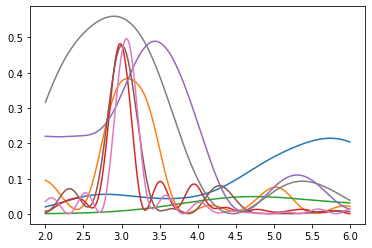

In [7]:
time_dict = {}
height_dict = {}
azimut_dict = {}
for satellite_code in data_dict:
    dataframe = data_dict[satellite_code]
    if not dataframe.empty:
        time_dict[satellite_code], height_dict[satellite_code], azimut_dict[satellite_code]\
             = esth.split_result(dataframe,time_interval,min_height,max_height)

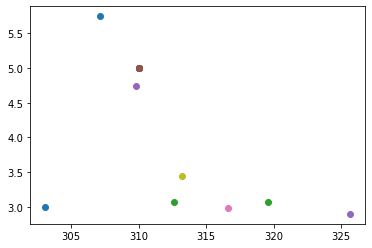

In [13]:
for satellite_code in azimut_dict:
    plt.scatter(azimut_dict[satellite_code], height_dict[satellite_code])